In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 3-point Classification
In order to classify if a shot is a 3-pointer or not, I need to recreate a 3-point line. I will "hack" this
solution by creating a circle from the hoop and determining if the (x, y) location of a shot is inside or
outside that circle.

In [3]:
# Load the CSV
shots_data = pd.read_csv("data/all_shots.csv")

In [4]:
# Compute Euclidean distance between two points (ChatGPT-generated code)
def distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

In [5]:
# Hoop Location
hoop_x = 306
hoop_y = 547
circle_radius = 275  # Assumed radius for the 3-point line. I played around with this value until it looked right on the chart


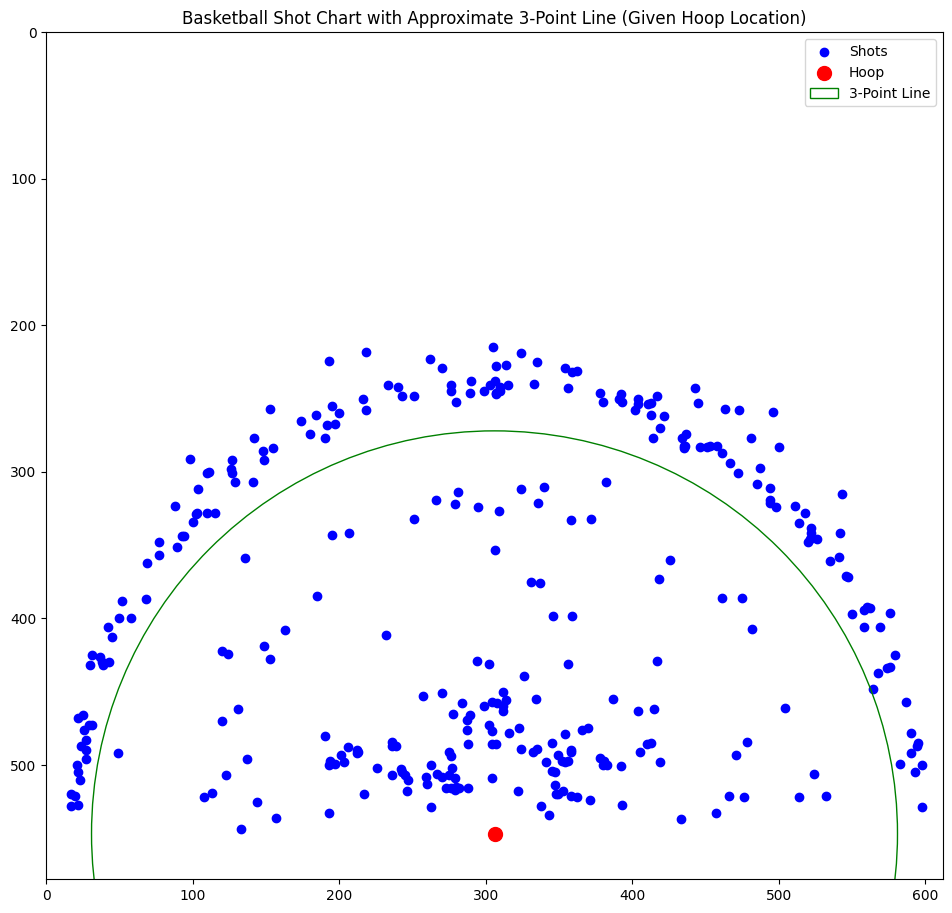

In [6]:
# Plot the shots with the given hoop location (ChatGPT-generated code)
plt.figure(figsize=(12, 11))
plt.scatter(shots_data['c_shot_x'], shots_data['c_shot_y'], marker='o', color='blue', label='Shots')
plt.scatter(hoop_x, hoop_y, marker='o', color='red', s=100, label='Hoop')

# Draw an approximate 3-point line as an arc around the hoop (ChatGPT-generated code)
circle = plt.Circle((hoop_x, hoop_y), circle_radius, color='green', fill=False, label='3-Point Line')
plt.gca().add_patch(circle)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.title("Basketball Shot Chart with Approximate 3-Point Line (Given Hoop Location)")
plt.xlim(0, 612)
plt.ylim(0, 578)
plt.gca().invert_yaxis()  # Invert y-axis to match the usual basketball court visualization

plt.show()


In [7]:
# Save the shot type as 3PA or 2PA depending if it's inside or outside the cirlce
shots_data['shot_type'] = shots_data.apply(lambda row: '3PA' if distance(row['c_shot_x'], row['c_shot_y'], hoop_x, hoop_y) > circle_radius else '2PA', axis=1)

shots_data.head(15)

,c_shot_x,c_shot_y,shot_type
0,213,491,2PA
1,304,509,2PA
2,276,245,3PA
3,362,522,2PA
4,413,253,3PA
5,391,250,3PA
6,457,533,2PA
7,302,473,2PA
8,303,241,3PA
9,77,357,3PA


# Shot Distance
As I built the 3PA or 2PA classifier, I thought it would be good to also get the distance (in feet) the shot was
taken. My coordinates are in pixels, so I need to code a way to convert pixels to feet. I know the free throw 
line is 15 feet away from the hoop, and the center of the free line is (306, 336) on my south-facing coordinate, 
so I can use that information to get the distance, in feet, of a given coordinate from the hoop

In [9]:
# First, calculate the pixel distance of each shot from the hoop
shots_data['distance_pixels'] = shots_data.apply(lambda row: distance(row['c_shot_x'], row['c_shot_y'], hoop_x, hoop_y), axis=1)

# Center free throw line
free_throw_line_x = 306
free_throw_line_y = 336

free_throw_distance_pixels = distance(hoop_x, hoop_y, free_throw_line_x, free_throw_line_y)

# Recalculate the pixel-to-foot ratio using the 15 feet assumption
pixel_to_foot_ratio = free_throw_distance_pixels / 15

print(pixel_to_foot_ratio)

# Convert the pixel distances to feet for all shots
shots_data['shot_distance_feet'] = shots_data['distance_pixels'] / pixel_to_foot_ratio

# Classify shots based on their distance from the given hoop location
shots_data['shot_type'] = shots_data.apply(lambda row: '3PA' if distance(row['c_shot_x'], row['c_shot_y'], hoop_x, hoop_y) > circle_radius else '2PA', axis=1)

# Drop the distance_pixels column. It was a helper column. Thanks for your help!
shots_data = shots_data.drop(['distance_pixels'], axis=1)

shots_data.head(15)

14.066666666666666


,c_shot_x,c_shot_y,shot_type,shot_distance_feet
0,213,491,2PA,7.717446
1,304,509,2PA,2.705161
2,276,245,3PA,21.574863
3,362,522,2PA,4.359739
4,413,253,3PA,22.241644
5,391,250,3PA,21.961417
6,457,533,2PA,10.780636
7,302,473,2PA,5.268343
8,303,241,3PA,21.754600
9,77,357,3PA,21.153441


In [8]:
# Save the data with the new columns (shot_distance_feet, and shot_type)
shots_data.to_csv("data/all_shots_enhanced.csv", index=False)